In [ ]:
using Gadfly

In [9]:
using DataFrames

In [12]:
birthdays = readtable("data-birthdays.csv")

,message_id,date,stars,user,body
1,37002684,2017-05-09,36,thefourtheye,Happy Birthday @BenjaminGruenbaum :-)
2,24952978,2015-08-07,30,rlemon,@Zirak HAPPY BELATED BIRTHDAY!!!!!!
3,32664012,2016-09-05,28,Some Guy,@rlemon Happy birthday! :D
4,17987063,2014-07-29,27,rlemon,HAPPY BIRTHDAY ZIRAK!
5,28042666,2016-01-11,26,Some Guy,@FlorianMargaine Happy birthday! :D
6,32620177,2016-09-01,26,Benjamin Gruenbaum,Happy birthday @MadaraUchiha!
7,18695023,2014-09-04,25,Benjamin Gruenbaum,Happy Birthday @rlemon !!!
8,33134482,2016-09-28,24,Some Guy,@Loktar Happy birthday! :D
9,33676588,2016-10-24,23,ndugger,HAPPY BIRTHDAY BAE-DGER... GET IT!?
10,41618699,2018-03-14,23,ShrekOverflow,"Today is PI Day, Albert Einstein's birthday and Stephen Hawking left us today. RIP Hawking."


In [14]:
typeof(birthdays)

DataFrames.DataFrame

First things first, we want to count how many users wish *other* users a happy birthday. My gut feeling is BadgerCat will win by a landslide.

In [24]:
wishingUsers = birthdays[:, :user]

100-element DataArrays.DataArray{String,1}:
 "thefourtheye"      
 "rlemon"            
 "Some Guy"          
 "rlemon"            
 "Some Guy"          
 "Benjamin Gruenbaum"
 "Benjamin Gruenbaum"
 "Some Guy"          
 "ndugger"           
 "ShrekOverflow"     
 "Badger Cat"        
 "Neoares"           
 "Badger Cat"        
 ⋮                   
 "Sterling Archer"   
 "Badger Cat"        
 "Badger Cat"        
 "Badger Cat"        
 "Badger Cat"        
 "jAndy"             
 "Badger Cat"        
 "Loktar"            
 "Zirak"             
 "user1596138"       
 "Badger Cat"        
 "Florian Margaine"  

In [30]:
wishingUsersCounts = countmap(wishingUsers)

Dict{Union{DataArrays.NAtype, String},Int64} with 23 entries:
  "Benjamin Gruenbaum" => 12
  "Ben Fortune"        => 1
  "Zirak"              => 2
  "SomeKittens"        => 1
  "towc"               => 1
  "Loktar"             => 7
  "Badger Cat"         => 28
  "Kamil Solecki"      => 1
  "Neoares"            => 3
  "copy"               => 1
  "Sterling Archer"    => 5
  "monners"            => 2
  "ndugger"            => 1
  "Some Guy"           => 10
  "little pootis"      => 1
  "ShrekOverflow"      => 4
  "Madara Uchiha"      => 1
  "thefourtheye"       => 2
  "jAndy"              => 2
  "rlemon"             => 8
  "Kendall Frey"       => 2
  "user1596138"        => 1
  "Florian Margaine"   => 4

You might not believe me, but doing `DataFrame(keys(...), values(...))` didn't actually work because of the associated types, but if we map them out to a simple array it's all good.

There might be a better way to convert them if I knew more about Julia's type system, but I'm fine with this.

In [70]:
df = DataFrame(User=map((x) -> x, keys(wishingUsersCounts)), Wishes=map((x) -> x, values(wishingUsersCounts)))

,User,Wishes
1,Benjamin Gruenbaum,12
2,Ben Fortune,1
3,Zirak,2
4,SomeKittens,1
5,towc,1
6,Loktar,7
7,Badger Cat,28
8,Kamil Solecki,1
9,Neoares,3
10,copy,1


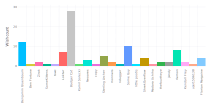

In [105]:
set_default_plot_size(800px, 400px);
Gadfly.with_theme(:default) do
    plot(df, x="User", y="Wishes", color="User",
        Geom.bar,Guide.xlabel(nothing), Guide.ylabel("Wish count"),
        Guide.colorkey(title=nothing, labels=[""], pos=[-100mm, -100mm]))
end

okay, that was only somewhat more difficult than expected. First, the results: Not too surprising, BadgerCat is the clear victor, with BenjaminGruenbaum eating dirt behind, flanked by SomeGuy. The rest are simply noise.

Next up we have how many users were *wished* a happy birthday. We'll try to extract that from the message body, and work on from there.

In [111]:
msg = birthdays[1, :]

,message_id,date,stars,user,body
1,37002684,2017-05-09,36,thefourtheye,Happy Birthday @BenjaminGruenbaum :-)


In [123]:
match(r"happy birthday @(\S+)"i, msg[1, :body])

RegexMatch("Happy Birthday @BenjaminGruenbaum", 1="BenjaminGruenbaum")

In [126]:
map((body) -> match(r"@(\S+)|happy birthday @?(\S+)"i, body), birthdays[:, :body])

100-element DataArrays.DataArray{Any,1}:
 RegexMatch("Happy Birthday @BenjaminGruenbaum", 1=nothing, 2="BenjaminGruenbaum")
 RegexMatch("@Zirak", 1="Zirak", 2=nothing)                                       
 RegexMatch("@rlemon", 1="rlemon", 2=nothing)                                     
 RegexMatch("HAPPY BIRTHDAY ZIRAK!", 1=nothing, 2="ZIRAK!")                       
 RegexMatch("@FlorianMargaine", 1="FlorianMargaine", 2=nothing)                   
 RegexMatch("Happy birthday @MadaraUchiha!", 1=nothing, 2="MadaraUchiha!")        
 RegexMatch("Happy Birthday @rlemon", 1=nothing, 2="rlemon")                      
 RegexMatch("@Loktar", 1="Loktar", 2=nothing)                                     
 RegexMatch("HAPPY BIRTHDAY BAE-DGER...", 1=nothing, 2="BAE-DGER...")             
 nothing                                                                          
 RegexMatch("@MadaraUchiha", 1="MadaraUchiha", 2=nothing)                         
 RegexMatch("@BadgerCat", 1="BadgerCat", 2=not

That gets *most* of them, let's see which ones it didn't get

In [127]:
for row in eachrow(birthdays)
    if match(r"@(\S+)|happy birthday @?(\S+)"i, row[:body]) === nothing
        println(row)
    end
end

DataFrameRow (row 10)
message_id  41618699
date        2018-03-14
stars       23
user        ShrekOverflow
body        Today is PI Day, Albert Einstein's birthday and Stephen Hawking left us today. RIP Hawking.

DataFrameRow (row 46)
message_id  33394844
date        2016-10-10
stars       17
user        monners
body        Happy Birthday... me.  (ಥ﹏ಥ)

DataFrameRow (row 51)
message_id  23533890
date        2015-05-27
stars       16
user        Some Guy
body        Happy birthday, GNi33!



Well that's a bit disheartening. First one's fine, we'll need to fix the regex for the 3rd one and correct some anomalies (e.g. bae-dger and "me").

In [128]:
birthdays[46, :body] = "Happy Birthday... @monners.  (ಥ﹏ಥ)"

"Happy Birthday... @monners.  (ಥ﹏ಥ)"

In [131]:
birthdays[9, :body] = "HAPPY BIRTHDAY @BadgerCat... GET IT!?"

"HAPPY BIRTHDAY @BadgerCat... GET IT!?"

search: end endof endswith ENDIAN_BOM send render append! corkendall QuoteNode

search: end endof endswith ENDIAN_BOM send render append! corkendall QuoteNode



In [129]:
for row in eachrow(birthdays)
    if match(r"@(\S+)|happy birthday[\s\.,]+@?(\S+)"i, row[:body]) === nothing
        println(row)
    end
end

DataFrameRow (row 10)
message_id  41618699
date        2018-03-14
stars       23
user        ShrekOverflow
body        Today is PI Day, Albert Einstein's birthday and Stephen Hawking left us today. RIP Hawking.



We're likely to discover more when we actually plot. We'll deal with them as they come. Let's create our data frame.

In [160]:
wishesCount = countmap(sort(map(function (body)
            m = match(r"@(\w+)|happy birthday[\s\.,]+@?(\w+)"i, body)
            if m === nothing
                return ""
            end

            if m.captures[1] === nothing
                lowercase(m.captures[2])
            else
                lowercase(m.captures[1])
            end
                end, birthdays[:, :body]).data))

Dict{String,Int64} with 47 entries:
  "badgercat"         => 3
  "madarauchiha"      => 3
  "ssube"             => 1
  "phenomnomnominal"  => 3
  "luggage"           => 1
  "nderscore"         => 1
  "benfortune"        => 3
  "jhoopins"          => 1
  "cereal"            => 1
  "nathanjones"       => 1
  "jandy"             => 3
  "hatterismad"       => 1
  "capricasix"        => 1
  "monners"           => 3
  "ivowetzel"         => 1
  "someguy"           => 3
  "thiefmaster"       => 5
  "m59"               => 1
  "kendallfrey"       => 2
  "dugger"            => 2
  "jordan"            => 1
  "cerbrus"           => 2
  "benjamingruenbaum" => 4
  "copy"              => 3
  "dystroy"           => 1
  ⋮                   => ⋮

In [166]:
wishesdf = DataFrame(User=map((x) -> x, keys(wishesCount)), Wishes=map((x) -> x, values(wishesCount)))

,User,Wishes
1,badgercat,3
2,madarauchiha,3
3,ssube,1
4,phenomnomnominal,3
5,luggage,1
6,nderscore,1
7,benfortune,3
8,jhoopins,1
9,cereal,1
10,nathanjones,1


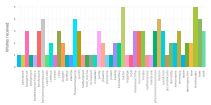

In [177]:
plot(sort(wishesdf, cols=[order(:User)]), x="User", y="Wishes", color="User",
    Geom.bar, Guide.xlabel(nothing), Guide.ylabel("Wishes received"),
    Guide.colorkey(title=nothing, labels=[""], pos=[-100mm, -100mm]))

If only gadfly had support for pie charts, but alas, we'll have to make do.

Now that we have that out of the way, let's do something a bit more interesting and sum up the amount of stars the birthday-recipients received.

Because I totally thought this through, we'll have to re-use our user-matching function from before.

In [184]:
birthdayStars = map(function (row)
            m = match(r"@(\w+)|happy birthday[\s\.,]+@?(\w+)"i, row[:body])
            if m === nothing
                return ["", 0]
            end

            [if m.captures[1] === nothing
                lowercase(m.captures[2])
            else
                lowercase(m.captures[1])
            end, row[:stars]]
        end, eachrow(birthdays))

100-element Array{Array{Any,1},1}:
 Any["benjamingruenbaum", 36]
 Any["zirak", 30]            
 Any["rlemon", 28]           
 Any["zirak", 27]            
 Any["florianmargaine", 26]  
 Any["madarauchiha", 26]     
 Any["rlemon", 25]           
 Any["loktar", 24]           
 Any["badgercat", 23]        
 Any["", 0]                  
 Any["madarauchiha", 22]     
 Any["badgercat", 22]        
 Any["loktar", 22]           
 ⋮                           
 Any["ssube", 12]            
 Any["mosho", 12]            
 Any["nderscore", 12]        
 Any["monners", 12]          
 Any["someguy", 11]          
 Any["loktar", 11]           
 Any["shmiddty", 11]         
 Any["towc", 11]             
 Any["ivowetzel", 11]        
 Any["hatterismad", 11]      
 Any["nathanjones", 11]      
 Any["ircmaxell", 11]        

In [203]:
starsCount = foldl(function reducer(accum, item)
    accum[item[1]] = get(accum, item[1], 0) + item[2]
    accum
end, Dict(), birthdayStars)

Dict{Any,Any} with 47 entries:
  "badgercat"         => 64
  "madarauchiha"      => 63
  "ssube"             => 12
  "phenomnomnominal"  => 44
  "luggage"           => 19
  "nderscore"         => 12
  "benfortune"        => 44
  "jhoopins"          => 13
  "cereal"            => 19
  "nathanjones"       => 11
  "jandy"             => 49
  "hatterismad"       => 11
  "capricasix"        => 17
  "monners"           => 43
  "ivowetzel"         => 11
  "someguy"           => 42
  "thiefmaster"       => 69
  "m59"               => 13
  "dugger"            => 32
  "kendallfrey"       => 36
  "jordan"            => 22
  "cerbrus"           => 30
  "benjamingruenbaum" => 89
  "dystroy"           => 21
  "copy"              => 45
  ⋮                   => ⋮

In [204]:
starsdf = DataFrame(User=map((x) -> x, keys(starsCount)), Wishes=map((x) -> x, values(starsCount)))

,User,Wishes
1,badgercat,64
2,madarauchiha,63
3,ssube,12
4,phenomnomnominal,44
5,luggage,19
6,nderscore,12
7,benfortune,44
8,jhoopins,13
9,cereal,19
10,nathanjones,11


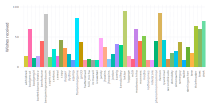

In [205]:
plot(sort(starsdf, cols=[order(:User)]), x="User", y="Wishes", color="User",
    Geom.bar, Guide.xlabel(nothing), Guide.ylabel("Wishes received"),
    Guide.colorkey(title=nothing, labels=[""], pos=[-100mm, -100mm]))

Now ordered by star count:

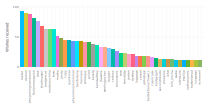

In [208]:
plot(sort(starsdf, cols=[order(:Wishes)], rev=true), x="User", y="Wishes", color="User",
    Geom.bar, Guide.xlabel(nothing), Guide.ylabel("Wishes received"),
    Guide.colorkey(title=nothing, labels=[""], pos=[-100mm, -100mm]))

But that's not fair, as some users may have been wished a happy birthday less often! Let's do a half-assed job of accounting for that:

In [216]:
totalStars = sum(birthdays[:stars])

1678

In [217]:
weightedStarsCount = map(pair -> Pair(pair[1], pair[2] / totalStars), starsCount)

Dict{String,Float64} with 47 entries:
  "badgercat"         => 0.0381406
  "madarauchiha"      => 0.0375447
  "ssube"             => 0.00715137
  "phenomnomnominal"  => 0.0262217
  "luggage"           => 0.011323
  "nderscore"         => 0.00715137
  "benfortune"        => 0.0262217
  "jhoopins"          => 0.00774732
  "cereal"            => 0.011323
  "nathanjones"       => 0.00655542
  "jandy"             => 0.0292014
  "hatterismad"       => 0.00655542
  "capricasix"        => 0.0101311
  "monners"           => 0.0256257
  "ivowetzel"         => 0.00655542
  "someguy"           => 0.0250298
  "thiefmaster"       => 0.0411204
  "m59"               => 0.00774732
  "dugger"            => 0.0190703
  "kendallfrey"       => 0.0214541
  "jordan"            => 0.0131108
  "cerbrus"           => 0.0178784
  "benjamingruenbaum" => 0.0530393
  "dystroy"           => 0.0125149
  "copy"              => 0.0268176
  ⋮                   => ⋮

Now we have the percentage of how each user's stars accounted for the total stars.

This did not explain anything but I have the flu and what I'm doing is graphs so flip off.

In [220]:
weighteddf = starsdf = DataFrame(User=map((x) -> x, keys(weightedStarsCount)), Weight=map((x) -> x, values(weightedStarsCount)));

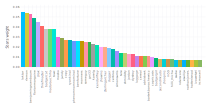

In [222]:
plot(sort(starsdf, cols=[order(:Weight)], rev=true), x="User", y="Weight", color="User",
    Geom.bar, Guide.xlabel(nothing), Guide.ylabel("Stars weight"),
    Guide.colorkey(title=nothing, labels=[""], pos=[-100mm, -100mm]))

In conclusion, it's obvious to see that loktar is the most loved room member. 2.9 loktar.

In [224]:
sum(values(weightedStarsCount))

0.9862932061978547